# Automated model generation

This document shows how to build models **automatically** assigning a sets **values** and **rules** relating the variables.

While the model built **mimics** the **Restaurant tipping demo** (see quickstart), the generated model is **not exactly the same**.

In [1]:
import zadeh

## Value generation

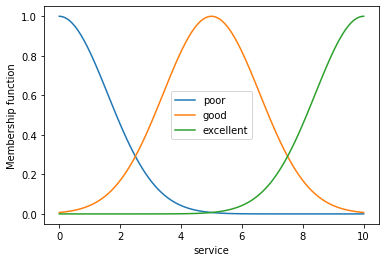

In [2]:
service = zadeh.FuzzyVariable.automatic(
    # First for parameters are the same as in FloatDomain
    "service",  # name of domain
    0,  # Start
    10,  # End
    100,  # Number of points to consider when the domain is plotted.
    # The rest of the parameters allow to control automatic generation
    3,  # Number of values
    endpoints=True,  # Whether to include the endpoints (defaults to True)
    width_factor=0.9,  # A scale factor to modify the values (defaults to 1.0)
    value_names=[
        "poor",
        "good",
        "excellent",
    ],  # Names of the values (can be automatically filled)
)
service.plot()

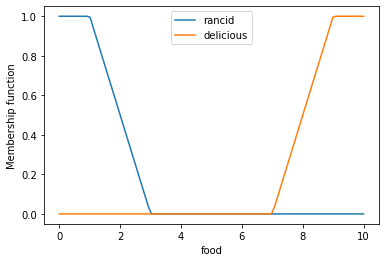

In [3]:
food = zadeh.FuzzyVariable.automatic(
    "food",
    0,
    10,
    100,
    2,
    # Shape and width chosen to mimic the original model
    shape="trapezoidal",
    width_factor=0.4,
    value_names=["rancid", "delicious"],
)
food.plot()

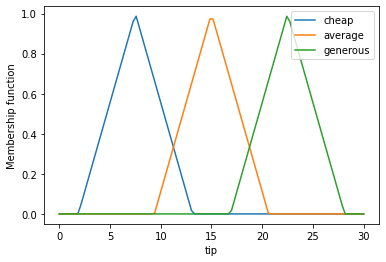

In [4]:
tip = zadeh.FuzzyVariable.automatic(
    "tip",
    0,
    30,
    100,
    3,
    # This set of values is the one that differs most when compared with the original problem
    # Automatic mode consider points evenly spaced, which was not the case for that one.
    endpoints=False,
    shape="triangular",
    width_factor=1.0,
    value_names=["cheap", "average", "generous"],
)
tip.plot()

## Rule generation

Most of the times, there is a monotonic increasing or decreasing relationship between an input and the output. This can be used to automatically generate the rules.

The code allows for automatic of variables with the same number of values, skipping an intermediate value if needed.

In [5]:
# Note two rule sets are combined with the "+" operator
rule_set = zadeh.FuzzyRuleSet.automatic(
    service, tip, reverse=False
) + zadeh.FuzzyRuleSet.automatic(food, tip, reverse=False)
for rule in rule_set:
    print(rule)

if (service is poor) then (tip is cheap) [1.000000]
if (service is good) then (tip is average) [1.000000]
if (service is excellent) then (tip is generous) [1.000000]
if (food is rancid) then (tip is cheap) [1.000000]
if (food is delicious) then (tip is generous) [1.000000]


## Overall system demo

The FIS can be build as usual.

In [6]:
fis = zadeh.FIS([food, service], rule_set, tip)

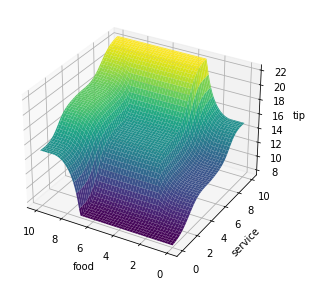

In [7]:
import matplotlib.pyplot as plt

fis.plot_2d(food, service)
plt.tight_layout()